# モデル訓練と予測
作成した**feature_engineering_prototype**関数を用いてモデル作成を行ってみる

## ライブラリのインポート

In [1]:
import os
import sys

import numpy as np
import pandas as pd

sys.path.append(os.path.abspath(os.path.dirname(os.getcwd())))
from conf.config import CFG, DIRS

from utils.load_datas import load_all_datas
from utils.feature_enginerring import feature_engineering_prototype
from utils.validations import cross_val_train

## configのインスタンス化

In [2]:
config = CFG()

## データの読み込み

In [3]:
# データのロード
train_df, test_df = load_all_datas()

## 特徴量に変換

In [ ]:
train_df, test_df = feature_engineering_prototype(train_df, test_df, config)

## データの切り分け

In [5]:
X_train_pp = train_df.loc[:, config.FEATURES]
y_train = train_df.loc[:, config.TARGET]
X_test_pp = test_df.loc[:, config.FEATURES]

## 予測

In [6]:
# パラメータの設定
params = {
    "objective": "regression",
    "verbosity": -1,
    "learning_rate": 0.05,
    "max_depth": 5,
    "min_child_weight": 1.0,
    "bagging_fraction": 0.8, # subsampleと同義
    "feature_fraction": 0.8, # colsample_bytreeと同義
    "random_state": config.SEED, 
}

In [7]:
val_scores, val_preds, test_preds, model = cross_val_train(X_train_pp, y_train, X_test_pp, params, config)

Training until validation scores don't improve for 100 rounds
[500]	valid_0's l2: 1.31129e+07
Early stopping, best iteration is:
[424]	valid_0's l2: 1.30623e+07
Fold: 0   Train RMSLE: 1775.7439  Val RMSLE: 3614.1782
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[300]	valid_0's l2: 1.76456e+07
Fold: 1   Train RMSLE: 2046.8304  Val RMSLE: 4200.6657
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[340]	valid_0's l2: 1.46415e+07
Fold: 2   Train RMSLE: 1933.4109  Val RMSLE: 3826.4276
--------------------------------------------------
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[320]	valid_0's l2: 1.39422e+07
Fold: 3   Train RMSLE: 2079.6961  Val RMSLE: 3733.9272
--------------------------------------------------
Training until validation sc

In [8]:
print(f"Mean RMSLE: {np.mean(val_scores):.5f}")

Mean RMSLE: 3925.09512


## 特徴量重要性

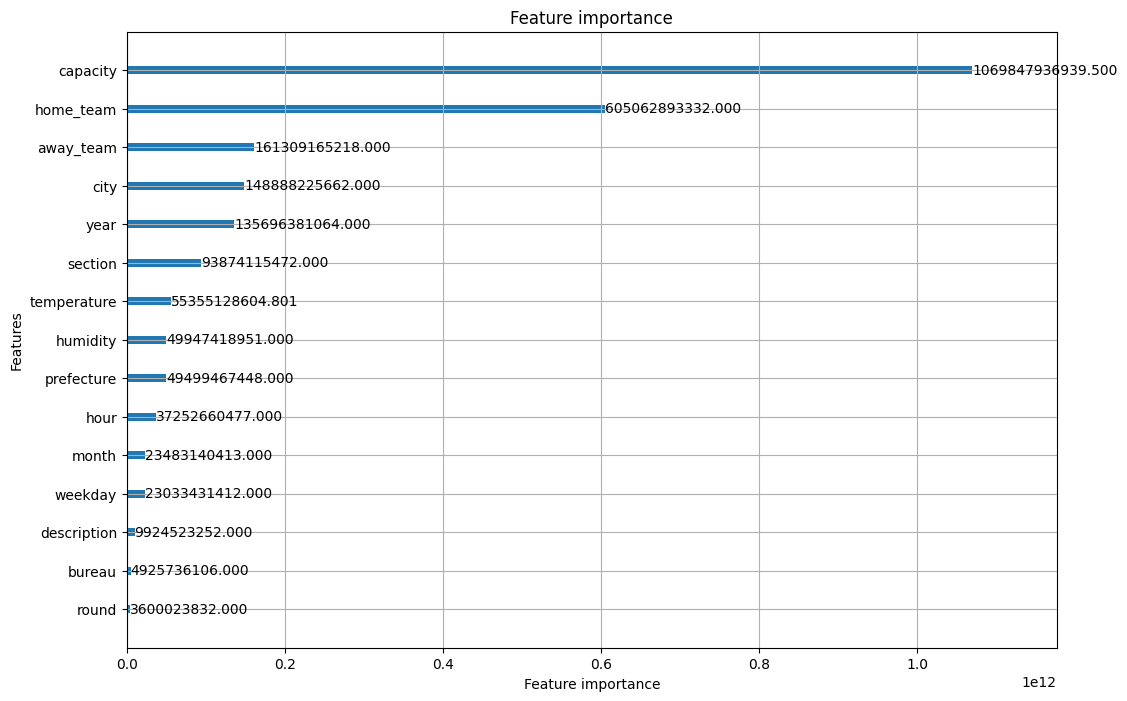

In [9]:
import matplotlib.pyplot as plt
import lightgbm as lgb

lgb.plot_importance(model, importance_type="gain", figsize=(12, 8))
plt.show()

## submitの作成

In [10]:
sub = pd.DataFrame({
    "id": test_df["id"],
    "attendance": test_preds,
})

sub.to_csv(os.path.join(DIRS["OUTPUT"], "submission_prototype2_base.csv"), index=False, header=None)

結果は**5272.3550656**となった